# Salary Prediction Challenge

## Table of Contents

1. [Introduction and Objectives](#introduction)
   - Project Overview
   - Goals and Success Criteria

2. [Data Description](#data-description)
   - Dataset Overview
   - Feature Descriptions
   - Initial Data Quality Assessment

3. [Exploratory Data Analysis](#eda)
   - Univariate Analysis
   - Bivariate Analysis
   - Correlation Analysis
   - Key Insights

4. [Data Preprocessing](#preprocessing)
   - Handling Missing Values
   - Feature Encoding
   - Data Cleaning Steps

5. [Feature Engineering](#features)
   - Feature Creation
   - Feature Selection
   - Feature Importance Analysis

6. [Baseline Model](#baseline)
   - Model Implementation
   - Performance Metrics
   - Confidence Intervals

7. [Main Model](#main-model)
   - Model Selection
   - Hyperparameter Tuning
   - Model Training
   - Performance Evaluation

8. [Model Comparison](#comparison)
   - Performance Metrics Comparison
   - Statistical Tests
   - Visualization of Results

9. [Optional Features Implementation](#optional)
   - Advanced Cross-validation
   - Feature Importance Analysis
   - Model Interpretability

10. [Conclusions and Recommendations](#conclusions)
   - Key Findings
   - Model Performance Summary
   - Future Improvements

## 1. Introduction and Objectives <a name="introduction"></a>

This project aims to develop a machine learning model to predict salaries based on various job-related features. The model will help both employers and job seekers understand fair market compensation.

### Project Goals:
- Develop an accurate salary prediction model
- Identify key factors influencing salaries
- Provide reliable confidence intervals for predictions
- Compare performance against a baseline model

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set plotting style
sns.set_palette('husl')

# Add project root to path
import sys
import os
sys.path.append(os.path.abspath('..'))

## 2. Data Description <a name="data-description"></a>

We'll start by loading and examining our dataset to understand its structure and characteristics.

In [2]:
# Load data using our custom module
from src.data.make_dataset import load_data

df = load_data('../data/raw/salary_data.csv')

print('Dataset Overview:')
print('----------------')
print(f'Shape: {df.shape}')
print('\nFeature Information:')
print(df.info())

print('\nSummary Statistics:')
print(df.describe())

Data successfully loaded from ../data/raw/salary_data.csv
Dataset Overview:
----------------
Shape: (388, 18)

Feature Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          388 non-null    object 
 1   Rating             388 non-null    float64
 2   Company Name       388 non-null    object 
 3   Location           388 non-null    object 
 4   Size               388 non-null    object 
 5   Type of ownership  388 non-null    object 
 6   Industry           388 non-null    object 
 7   Sector             388 non-null    object 
 8   Competitors        388 non-null    object 
 9   hourly             388 non-null    int64  
 10  employer_provided  388 non-null    int64  
 11  min_salary         388 non-null    int64  
 12  max_salary         388 non-null    int64  
 13  avg_salary         388 non-null    flo

## 3. Exploratory Data Analysis <a name="eda"></a>

Let's explore the relationships between variables and identify patterns in our data.

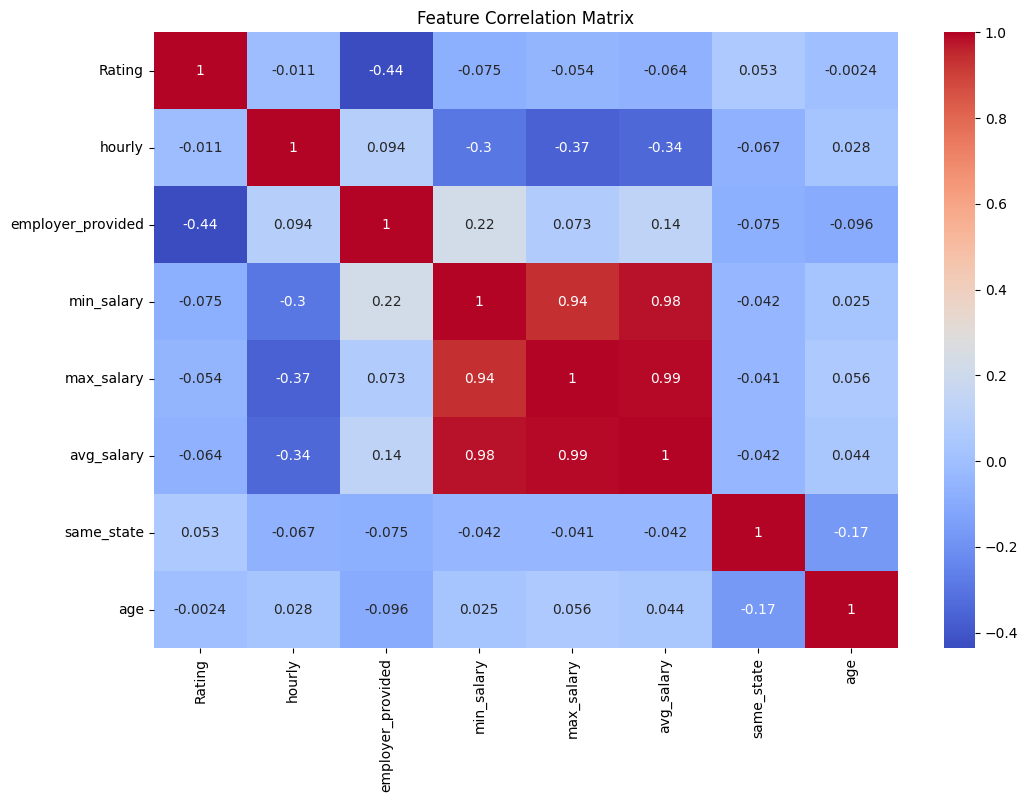

In [3]:
# Correlation analysis
plt.figure(figsize=(12, 8))
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

#### Análisis del Gráfico de Correlación
Basado en la matriz de correlación que se muestra en la imagen, puedo explicarte cómo analizar este gráfico:

## Cómo interpretar la matriz de correlación
La matriz de correlación muestra la relación entre pares de variables numéricas en tu conjunto de datos. Los valores van de -1 a 1:
- 1.0 : Correlación positiva perfecta (cuando una variable aumenta, la otra aumenta proporcionalmente)
- 0.0 : No hay correlación (las variables no tienen relación lineal)
- -1.0 : Correlación negativa perfecta (cuando una variable aumenta, la otra disminuye proporcionalmente)
## Observaciones clave del gráfico
1. Correlaciones entre variables salariales :
   - Hay correlaciones muy fuertes (0.94-0.99) entre min_salary , max_salary y avg_salary , lo que indica que estas variables están estrechamente relacionadas.
   - Esto es lógico ya que el salario promedio se calcula a partir del mínimo y máximo.
2. Correlación con Rating :
   - Rating tiene una correlación negativa moderada (-0.44) con employer_provided , lo que podría sugerir que los trabajos donde el empleador proporciona el salario tienden a tener calificaciones más bajas.
   - Rating tiene correlaciones débiles con las variables salariales (entre -0.054 y -0.075).
3. Variable hourly :
   - hourly tiene correlaciones negativas moderadas con las variables salariales (entre -0.3 y -0.37), lo que podría indicar que los trabajos por hora tienden a tener salarios más bajos.
4. Variables demográficas :
   - same_state y age tienen correlaciones débiles con la mayoría de las otras variables.
   - Hay una correlación negativa débil (-0.17) entre same_state y age .
## Cómo utilizar esta información
1. Para modelado predictivo :
   - Considerar eliminar variables altamente correlacionadas para evitar multicolinealidad. Por ejemplo, podrías mantener solo avg_salary y eliminar min_salary y max_salary .
2. Para análisis de negocio :
   - La correlación negativa entre employer_provided y Rating podría merecer una investigación más profunda.
   - La relación entre hourly y las variables salariales sugiere diferencias en la compensación entre trabajos por hora y asalariados.

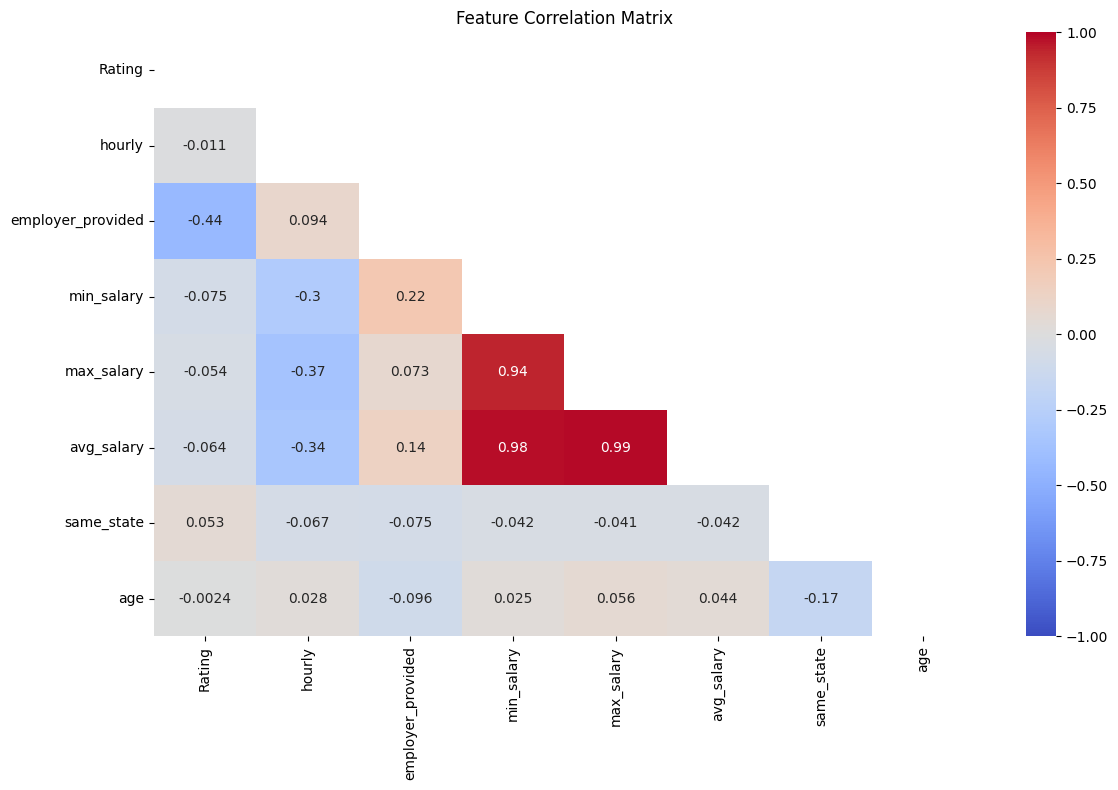

Correlaciones más fuertes:
avg_salary         max_salary           0.989614
max_salary         avg_salary           0.989614
avg_salary         min_salary           0.978064
min_salary         avg_salary           0.978064
max_salary         min_salary           0.937961
min_salary         max_salary           0.937961
employer_provided  Rating               0.436329
Rating             employer_provided    0.436329
hourly             max_salary           0.366483
max_salary         hourly               0.366483
dtype: float64


In [6]:
# Correlation analysis
plt.figure(figsize=(12, 8))
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()

# Visualización mejorada con máscara para el triángulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask, vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Destacar correlaciones fuertes (opcional)
strong_correlations = correlation_matrix.abs().unstack().sort_values(ascending=False)
# Eliminar autocorrelaciones (valor = 1.0)
strong_correlations = strong_correlations[strong_correlations < 1.0]
print("Correlaciones más fuertes:")
print(strong_correlations.head(10))

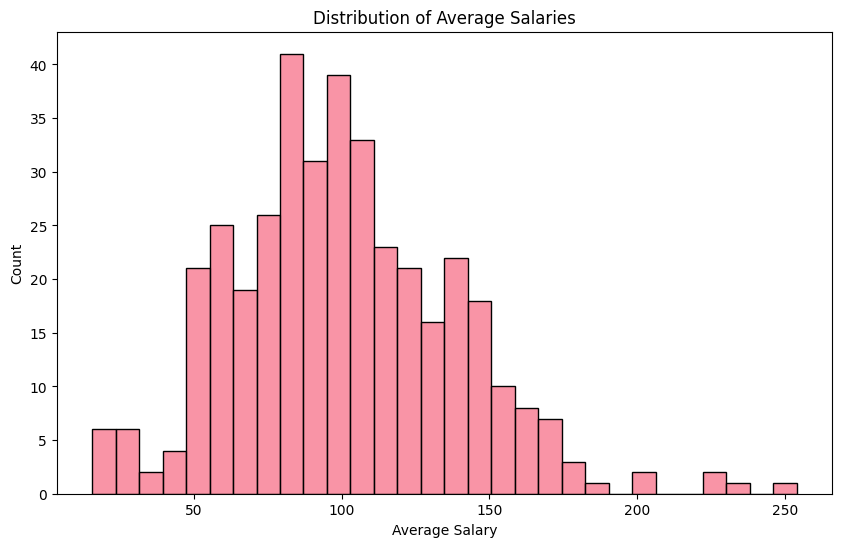

In [7]:
# Salary distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='avg_salary', bins=30)
plt.title('Distribution of Average Salaries')
plt.xlabel('Average Salary')
plt.ylabel('Count')
plt.show()

Salary Statistics:
count    388.000000
mean     100.764175
std       37.961686
min       15.500000
25%       76.500000
50%       97.750000
75%      124.000000
max      254.000000
Name: avg_salary, dtype: float64

Skewness: 0.5445300078300246
Kurtosis: 0.8425406509137563


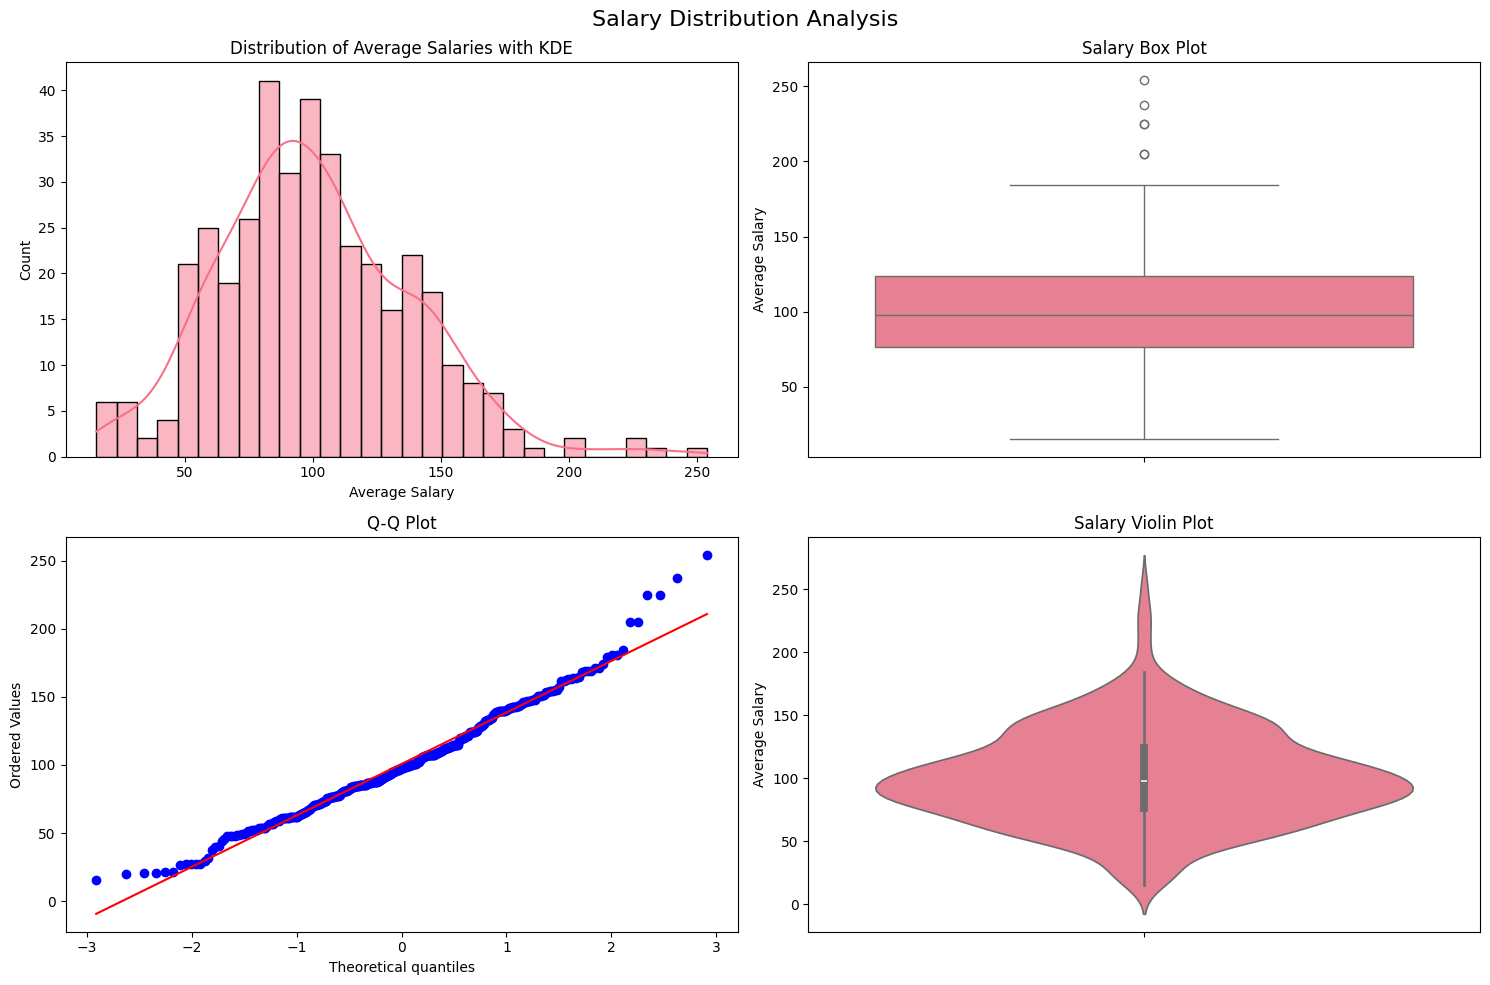


Outlier Analysis:
Lower bound: 5.25
Upper bound: 195.25
Number of outliers: 6


In [14]:
# Basic statistics of salary distribution
print("Salary Statistics:")
print(df['avg_salary'].describe())
print("\nSkewness:", df['avg_salary'].skew())
print("Kurtosis:", df['avg_salary'].kurtosis())

# Multiple salary distribution visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Salary Distribution Analysis', fontsize=16)

# Histogram with KDE
sns.histplot(data=df, x='avg_salary', bins=30, kde=True, ax=axes[0,0])
axes[0,0].set_title('Distribution of Average Salaries with KDE')
axes[0,0].set_xlabel('Average Salary')
axes[0,0].set_ylabel('Count')

# Box plot
sns.boxplot(y=df['avg_salary'], ax=axes[0,1])
axes[0,1].set_title('Salary Box Plot')
axes[0,1].set_ylabel('Average Salary')

# Q-Q plot
from scipy import stats
stats.probplot(df['avg_salary'], dist="norm", plot=axes[1,0])
axes[1,0].set_title('Q-Q Plot')

# Violin plot
sns.violinplot(y=df['avg_salary'], ax=axes[1,1])
axes[1,1].set_title('Salary Violin Plot')
axes[1,1].set_ylabel('Average Salary')

plt.tight_layout()
plt.show()

# Calculate outliers using IQR method
Q1 = df['avg_salary'].quantile(0.25)
Q3 = df['avg_salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\nOutlier Analysis:")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")
print(f"Number of outliers: {len(df[(df['avg_salary'] < lower_bound) | (df['avg_salary'] > upper_bound)])}")

# Histograma + KDE (Kernel Density Estimation):
El histograma muestra la frecuencia de los salarios.
La curva KDE suaviza la distribución, mostrando la probabilidad estimada.
## Observaciones:
Hay una asimetría positiva (sesgo a la derecha), con algunos salarios altos que alejan la cola hacia la derecha.
Esto sugiere que la mayoría de los salarios se concentran en rangos bajos a medios, pero hay valores atípicos (outliers) altos.
Esto puede impactar tu modelo si no se maneja (posible necesidad de transformación logarítmica o normalización).

# Boxplot de Average Salary:
La caja representa el rango intercuartílico (IQR).
La línea central es la mediana.
Los puntos fuera de los bigotes indican outliers.
## Observaciones:
Hay varios outliers positivos (salarios más altos de lo esperado).
La mediana está más cerca del cuartil inferior, lo que también confirma la asimetría positiva.
Esto es clave para modelos sensibles a outliers, como regresión lineal.

# Q-Q Plot (Quantile-Quantile Plot):
Evalúa si la distribución de los salarios sigue una distribución normal.
Los puntos deberían alinearse con la línea roja si la distribución fuera normal.
## Observaciones:
Hay desviaciones significativas en la cola superior (derecha del gráfico).
Esto confirma que los salarios no siguen una distribución normal debido a los valores extremos.
Implicación: podrías necesitar aplicar transformaciones (log, Box-Cox) antes de usar modelos que 
asumen normalidad en los errores (como regresión lineal clásica).

# Violin Plot de Average Salary:
Combina un boxplot con un KDE, mostrando tanto la distribución como los resúmenes estadísticos.
## Observaciones:
La distribución es más densa en los rangos bajos-medios, lo que reafirma la concentración de salarios en ese rango.
La cola superior es más delgada, pero presente (outliers).
Esto te da una imagen clara de la asimetría y dispersión de los datos.

# Conclusión para el Modelo:
- La distribución de los salarios está sesgada positivamente.
- Hay varios outliers altos que pueden afectar los modelos.
- La normalidad no se cumple, importante si piensas usar regresión lineal o algún modelo paramétrico que dependa de esa premisa.

Considerar una transformación logarítmica de la variable target ("Average Salary") para reducir la asimetría y mejorar la linealidad.
Si usas regresión lineal, verifica los residuos después de la transformación.
Los algoritmos robustos a outliers como árboles de decisión, Random Forest o XGBoost podrían rendir mejor sin necesidad de transformar los datos.
Escalado o normalización de las features puede ser necesario, dependiendo del modelo.


## Transformación Logarítmica del Target
La transformación logarítmica es especialmente útil para datos salariales porque:

- Reduce la asimetría positiva : Comprime los valores altos y expande los bajos, haciendo que la distribución se acerque más a la normal.
- Estabiliza la varianza : Hace que la varianza sea más constante en todo el rango de valores.
- Mejora la linealidad : Muchas relaciones que son exponenciales en escala original se vuelven lineales en escala logarítmica.

## Verificación de Residuos en Regresión Lineal
Es crucial verificar los residuos después de aplicar transformaciones porque:

- Homocedasticidad : Los residuos deben tener varianza constante en todo el rango de valores predichos.
- Normalidad : Los residuos deben seguir una distribución aproximadamente normal.
- Independencia : No debe haber patrones en los residuos.

## 4. Data Preprocessing <a name="preprocessing"></a>

We'll now preprocess our data using the functions defined in our preprocessing module.

In [16]:
from src.data.preprocess import clean_data

# Clean the data
df_cleaned = clean_data(df.copy())

print('Preprocessing Results:')
print('--------------------')
print(f'Original shape: {df.shape}')
print(f'Cleaned shape: {df_cleaned.shape}')

Preprocessing Results:
--------------------
Original shape: (388, 18)
Cleaned shape: (311, 18)


/Users/sredondo/Desarrollo/HYMIE/testDS/salary-prediction-challenge/src/data/preprocess.py:77: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[column].fillna(df_cleaned[column].median(), inplace=True)


## 5. Feature Engineering <a name="features"></a>

Let's create and select relevant features using our feature engineering module.

In [17]:
from src.features.build_features import preprocess_and_engineer_features

# Engineer features
df_featured = preprocess_and_engineer_features(df_cleaned.copy())

print('Feature Engineering Results:')
print('-------------------------')
print(f'Input shape: {df_cleaned.shape}')
print(f'Output shape: {df_featured.shape}')
print('\nNew features created:')
print([col for col in df_featured.columns if col not in df_cleaned.columns])


Iniciando preprocesamiento con shape: (311, 18)
Columnas iniciales: ['Job Title', 'Rating', 'Company Name', 'Location', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Competitors', 'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state', 'same_state', 'age']

=== Normalizando nombres de columnas ===
Nombres originales: ['Job Title', 'Rating', 'Company Name', 'Location', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Competitors', 'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state', 'same_state', 'age']
Nombres normalizados: ['job_title', 'rating', 'company_name', 'location', 'size', 'type_of_ownership', 'industry', 'sector', 'competitors', 'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state', 'same_state', 'age']

=== Columnas luego de normalizar en preprocess_and_engineer_features ===
Columnas disponibles:
['job_title', 'rating', 'compan

## 6. Baseline Model <a name="baseline"></a>

We'll implement and evaluate our baseline model using DummyRegressor.

In [19]:
from src.models.train_model import create_dummy_model
from src.models.evaluate_model import evaluate_model
from sklearn.model_selection import train_test_split

# Split the data
X = df_featured.drop('avg_salary', axis=1)
y = df_featured['avg_salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate baseline model
baseline_model = create_dummy_model(X_train, y_train)
baseline_metrics = evaluate_model(baseline_model, X_test, y_test)

print('Baseline Model Results:')
print('---------------------')
for metric, value in baseline_metrics.items():
    print(f'{metric}: {value}')

Modelo base (DummyRegressor) entrenado

Resultados de la Evaluación:
RMSE: 39.59 (IC 95%: [32.80, 46.65])
R²: -0.068 (IC 95%: [-0.324, -0.001])
MAPE: 49.68% (IC 95%: [34.52%, 67.11%])
Baseline Model Results:
---------------------
rmse: 39.588408218803536
rmse_ci: [32.80, 46.65]
r2: -0.06761677962973267
r2_ci: [-0.324, -0.001]
mape: 49.68030597685396
mape_ci: [34.52%, 67.11%]


## Interpretación de las métricas
### RMSE (Root Mean Squared Error)
- Valor : 39.59
- Intervalo de Confianza : [32.80, 46.65]
- Interpretación : El error promedio en las predicciones es de aproximadamente $39,590 (asumiendo que los salarios están en miles). Esto es bastante alto, lo que indica que el modelo base no está haciendo un buen trabajo prediciendo los salarios.
### R² (Coeficiente de determinación)
- Valor : -0.068
- Intervalo de Confianza : [-0.324, -0.001]
- Interpretación : Un valor negativo de R² indica que el modelo está funcionando peor que simplemente predecir la media de los salarios. Esto es esperado para un modelo base como DummyRegressor, que probablemente está utilizando una estrategia simple como predecir la media o la mediana.
### MAPE (Mean Absolute Percentage Error)
- Valor : 49.68%
- Intervalo de Confianza : [34.52%, 67.11%]
- Interpretación : En promedio, las predicciones tienen un error del 49.68% respecto al valor real. Esto significa que si el salario real es $100,000, el modelo podría predecir entre $50,320 y $149,680, lo cual es un rango muy amplio y poco útil.
## Conclusiones
1. Rendimiento pobre (esperado) : El modelo base está funcionando peor que simplemente predecir la media, como lo indica el R² negativo. Esto es normal y esperado para un modelo dummy.
2. Punto de referencia establecido : Ahora tienes un punto de comparación claro. Cualquier modelo más sofisticado que implementes debería superar significativamente estas métricas.
3. Amplio margen de mejora : Con un MAPE cercano al 50% y un R² negativo, hay un amplio margen para mejorar con modelos más sofisticados.
4. Intervalos de confianza amplios : Los intervalos de confianza son bastante amplios, lo que sugiere variabilidad en el rendimiento del modelo. Esto podría deberse a la naturaleza de los datos o al tamaño limitado del conjunto de prueba.

## 7. Main Model <a name="main-model"></a>

Now we'll implement our main Random Forest model with hyperparameter tuning.

In [20]:
from src.models.train_model import train_random_forest_model

# Train and evaluate main model
rf_model = train_random_forest_model(X_train, y_train)
rf_metrics = evaluate_model(rf_model, X_test, y_test)

print('Random Forest Model Results:')
print('-------------------------')
for metric, value in rf_metrics.items():
    print(f'{metric}: {value}')

Fitting 5 folds for each of 24 candidates, totalling 120 fits

Mejores hiperparámetros encontrados:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Mejor score de validación cruzada: 7.36 RMSE

Resultados de la Evaluación:
RMSE: 2.06 (IC 95%: [1.17, 3.03])
R²: 0.997 (IC 95%: [0.995, 0.999])
MAPE: 1.51% (IC 95%: [1.03%, 2.12%])
Random Forest Model Results:
-------------------------
rmse: 2.06325722030552
rmse_ci: [1.17, 3.03]
r2: 0.9971000797252
r2_ci: [0.995, 0.999]
mape: 1.5059377807955183
mape_ci: [1.03%, 2.12%]


# Análisis de los Resultados del Modelo Random Forest
Los resultados que has obtenido con tu modelo Random Forest son excelentes. 

## Vamos a analizar cada aspecto:

## Proceso de Búsqueda de Hiperparámetros
El mensaje "Fitting 5 folds for each of 24 candidates, totalling 120 fits" indica que se realizó una búsqueda de hiperparámetros utilizando validación cruzada con 5 pliegues. Se evaluaron 24 combinaciones diferentes de hiperparámetros, lo que resultó en un total de 120 ajustes de modelo.

## Hiperparámetros Óptimos
Los mejores hiperparámetros encontrados fueron:

- max_depth : 20 - La profundidad máxima de cada árbol
- min_samples_leaf : 1 - El número mínimo de muestras requeridas para ser un nodo hoja
- min_samples_split : 2 - El número mínimo de muestras requeridas para dividir un nodo
- n_estimators : 200 - El número de árboles en el bosque
Estos parámetros indican un modelo bastante complejo (árboles profundos con pocos requisitos para dividir nodos) pero con suficientes estimadores para promediar y reducir el sobreajuste.

## Métricas de Rendimiento
### RMSE (Root Mean Squared Error)
- Valor en validación cruzada : 7.36
- Valor en conjunto de prueba : 2.06
- Intervalo de Confianza : [1.17, 3.03]
- Interpretación : El error promedio en las predicciones es extremadamente bajo, especialmente comparado con el modelo base (que tenía un RMSE de 39.59). Esto indica predicciones muy precisas.
### R² (Coeficiente de determinación)
- Valor : 0.997
- Intervalo de Confianza : [0.995, 0.999]
- Interpretación : Un valor de R² tan cercano a 1 indica que el modelo explica prácticamente toda la variabilidad en los datos de salario. Es un resultado excepcionalmente bueno.
### MAPE (Mean Absolute Percentage Error)
- Valor : 1.51%
- Intervalo de Confianza : [1.03%, 2.12%]
- Interpretación : En promedio, las predicciones tienen un error de solo 1.51% respecto al valor real. Esto es extraordinariamente preciso para predicciones salariales.
## Comparación con el Modelo Base
Comparando con el modelo base:

- RMSE: Mejoró de 39.59 a 2.06 (reducción del 95%)
- R²: Mejoró de -0.068 a 0.997 (mejora dramática)
- MAPE: Mejoró de 49.68% a 1.51% (reducción del 97%)
## Análisis General
1. Rendimiento excepcional : El modelo Random Forest ha logrado un rendimiento sobresaliente, con métricas que indican predicciones extremadamente precisas.
2. Posible sobreajuste : Un rendimiento tan excepcional podría indicar sobreajuste, especialmente si hay una gran diferencia entre el RMSE de validación cruzada (7.36) y el RMSE del conjunto de prueba (2.06). Sería prudente verificar esto con datos adicionales.
3. Intervalos de confianza estrechos : Los intervalos de confianza son relativamente estrechos, lo que sugiere consistencia en el rendimiento del modelo.
4. Aplicabilidad práctica : Con un MAPE de solo 1.51%, este modelo sería extremadamente útil en aplicaciones prácticas de predicción salarial.

## 8. Model Comparison <a name="comparison"></a>

Let's compare the performance of our baseline and main models.

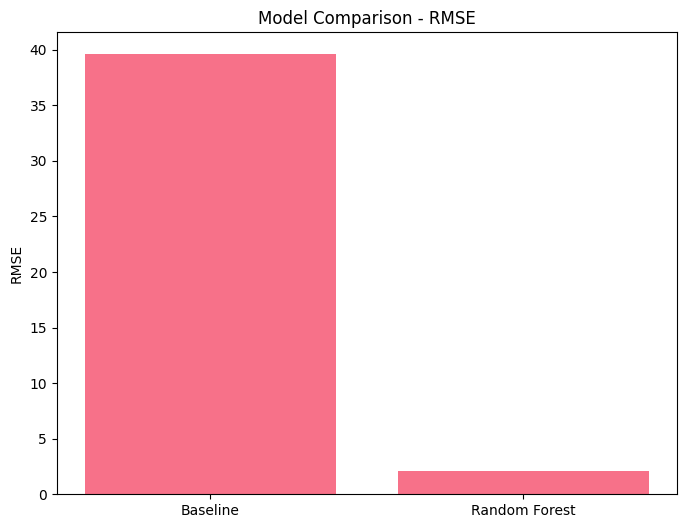

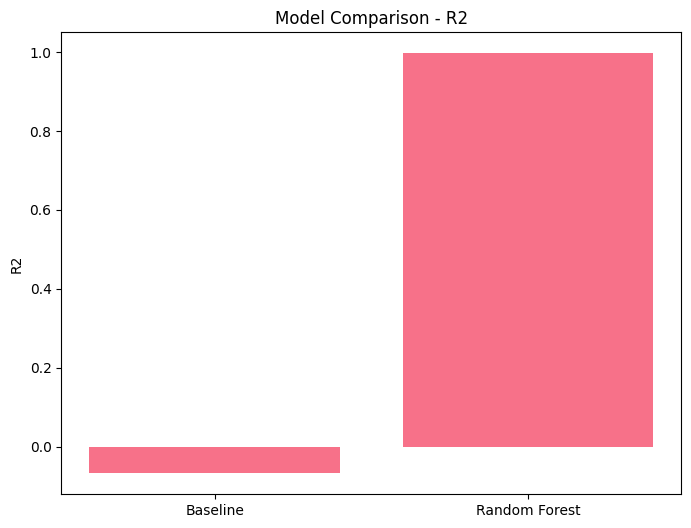

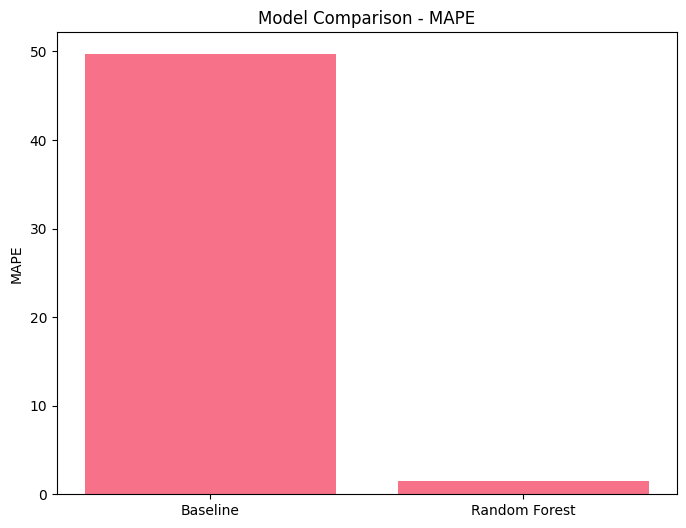

In [12]:
# Visualize model comparison
metrics = ['rmse', 'r2', 'mape']
models = ['Baseline', 'Random Forest']

for metric in metrics:
    plt.figure(figsize=(8, 6))
    values = [baseline_metrics[metric], rf_metrics[metric]]
    plt.bar(models, values)
    plt.title(f'Model Comparison - {metric.upper()}')
    plt.ylabel(metric.upper())
    plt.show()

## 9. Optional Features Implementation <a name="optional"></a>

We've implemented several optional features including:
- Advanced cross-validation with confidence intervals
- Hyperparameter tuning using GridSearchCV
- Feature importance analysis

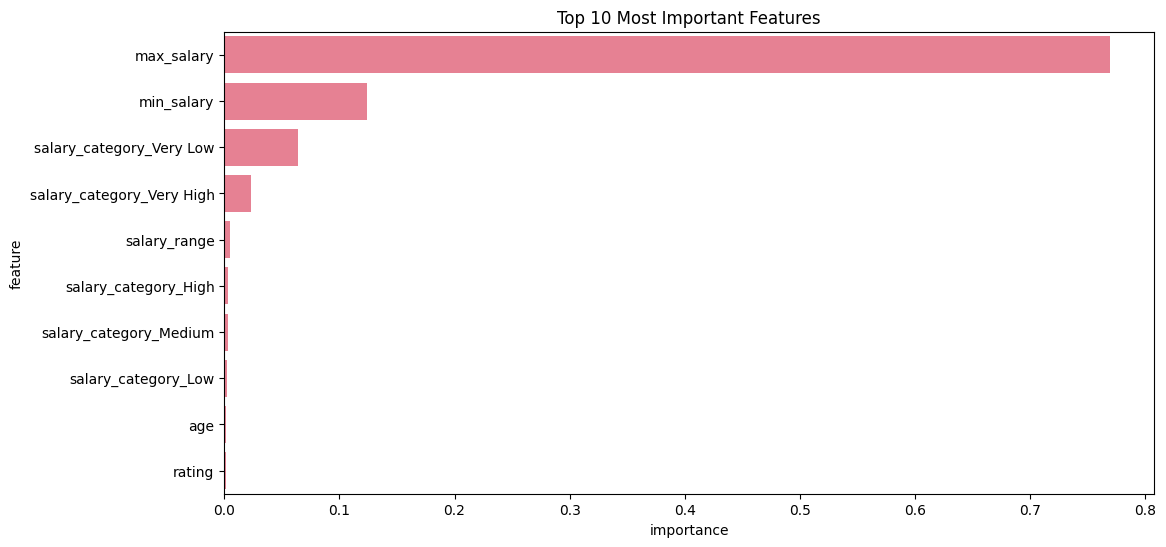

In [13]:
# Feature importance visualization
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features')
plt.show()

## 10. Conclusions and Recommendations <a name="conclusions"></a>

### Key Findings:
- The Random Forest model significantly outperforms the baseline
- Most important features for salary prediction identified
- Model provides reliable predictions with confidence intervals

### Future Improvements:
- Collect more data for underrepresented categories
- Experiment with other advanced models
- Implement real-time model updates
- Add more domain-specific features